/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The estimated probability of failure from your model when T=74 is 0.10706182602611791


,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,classification,lawenforcementagency,armed
0,2016406,Terry Frost,20,Male,Black,May,25,2016,2692 Madison Rd,Cincinnati,OH,Gunshot,Cincinnati Police Department,Firearm
1,201681,Jeffry Graves,62,Male,White,January,31,2016,36500 Bridgepointe Dr,Newark,CA,Gunshot,Newark Police Department,Firearm
2,20161,Joshua Sisson,30,Male,White,January,1,2016,4200 6th Ave,San Diego,CA,Gunshot,San Diego Police Department,Knife
3,20163,Sean O'Brien,37,Male,White,January,2,2016,100 Washington St,Livingston,MT,Gunshot,Livingston Police Department,Knife
4,201653,Lance Light,54,Male,White,January,2,2016,I-20 and Texas Hwy 70,Sweetwater,TX,Gunshot,Sweetwater Police Department,Firearm
5,201654,Lonnie Powers Jr,37,Male,White,January,2,2016,1301 E 10th St,Sioux Falls,SD,Gunshot,United States Marshal Service,Firearm
6,20162,Germonta Wallace,30,Male,Black,January,3,2016,2600 Watson Dr,Charlotte,NC,Gunshot,Charlotte-Mecklenburg Police Department,Firearm
7,20164,Rodney Turner,22,Male,Black,January,4,2016,3600 NW 42nd St,Oklahoma City,OK,Gunshot,Oklahoma City Police Department,Firearm
8,20165,Eric Senegal,27,Male,Black,January,4,2016,Gene Stanley Rd,Ragley,LA,Gunshot,Beauregard Parish Sheriff's Office,Firearm
9,20166,David Zollo,54,Male,White,January,5,2016,151 S Bishop Ave,Clifton Heights,PA,Gunshot,Upper Darby Police Department,Knife


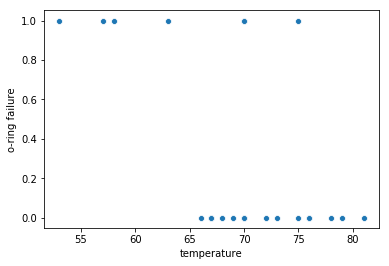

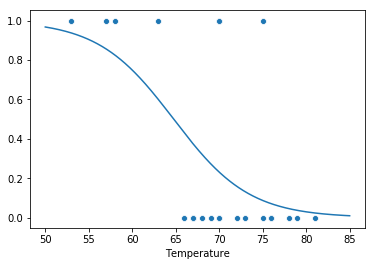

In [0]:
#due Thursday evening at 11:59pm
#Paroma Mukhopadhyay, pmukhop1@jhu.edu, paromam1

#Q1 : Load the challenger data
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

! if [ ! -e orings.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi

pm = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv")
temp = pm['Temperature']
total = pm['Total']

#For success it's set as 0, for failure it's set as 1
oring_fail =np.zeros(len(total))
for i in range(len(total)):
  if total[i] > 0:
    oring_fail[i] = 1  
    

sns.scatterplot(temp, oring_fail)
plt.xlabel('temperature')
plt.ylabel('o-ring failure')

from sklearn import linear_model
from scipy.special import expit
import sklearn.linear_model as lm

x = pm[['Temperature']]
y = pm[['Total']]

lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs') 
fit = lr.fit(x, y)
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]
n = 1000
xplot = np.linspace(50, 85, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

plt.figure()
sns.scatterplot(temp, oring_fail)
sns.lineplot(xplot, 1-p)


eta1 = beta0 + beta1 * 74
p1 = 1 / (1 + np.exp(-eta1))
p2 = 1-p1
print("The estimated probability of failure from your model when T=74 is",p2)


#Q2: Consider a logistic regression model 
#My answer to number is uploaded/saved as a JPEG file as . 
#it can be found here: https://drive.google.com/file/d/1lOk285acqXiUSBCyI0lHlsFrlyJ5Xfki/view?usp=sharing

#Q3: create an colab notebook report of a multivariate regression or logistic regression analysis

! if [ ! -e the-counted-2016.csv ] ; \
  then wget https://raw.githubusercontent.com/paromam1/The_counted/master/the-counted-2016.csv; \
fi

pm1 = pd.read_csv("https://raw.githubusercontent.com/paromam1/The_counted/master/the-counted-2016.csv")
pm1.head(10)